# Assignment 7.2

REFERRAL CODE: SIRSS2105
<br>**SHUBHAM SALOKHE**

**Heart Attack Analysis & Prediction**


- Analysis & Predict Heart Attack based on Age, Gender, No. of disease they have and some other aspects
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/tasks?taskId=3833

In [2]:
df_train = pd.read_csv('heart.csv')
df_test = pd.read_csv('o2Saturation.csv')

In [3]:
df_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_train.shape

(303, 14)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_train.isnull().sum().sort_values(ascending = False)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df_train.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

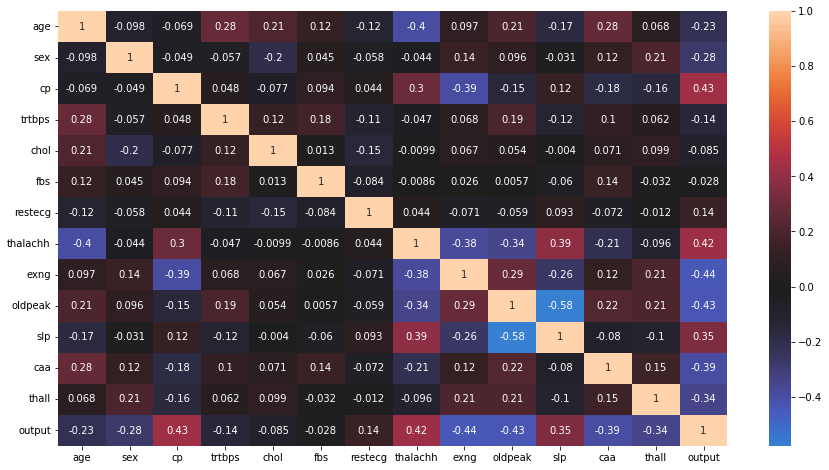

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(df_train.corr(),center = 0, annot =True)

In [12]:
df_train.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [13]:
df_train.duplicated().sort_values(ascending = False)

164     True
0      False
200    False
206    False
205    False
       ...  
100    False
99     False
98     False
97     False
302    False
Length: 303, dtype: bool

In [14]:
pd.options.display.min_rows= 15
df_train.drop_duplicates(inplace =True)

In [15]:
df_train.duplicated().sort_values(ascending = False)

0      False
208    False
206    False
205    False
204    False
203    False
202    False
       ...  
102    False
101    False
100    False
99     False
98     False
97     False
302    False
Length: 302, dtype: bool

In [16]:
df_train.shape

(302, 14)

In [17]:
df_train.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

### Visualization 

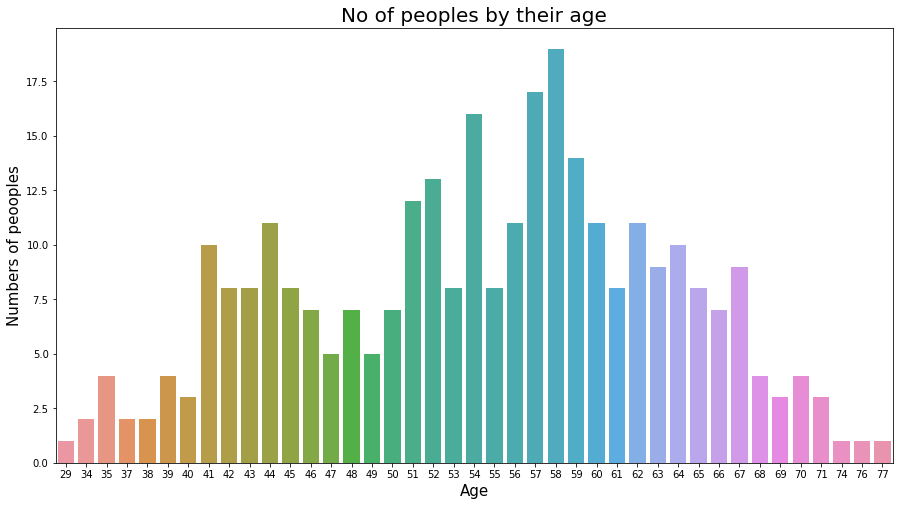

In [18]:
# now Looking at the age 
plt.figure(figsize = (15,8))
sns.countplot(x ='age', data = df_train)
plt.title('No of peoples by their age', fontsize = 20)
plt.xlabel('Age',fontsize =15 )
plt.ylabel('Numbers of peooples',fontsize =15 )
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


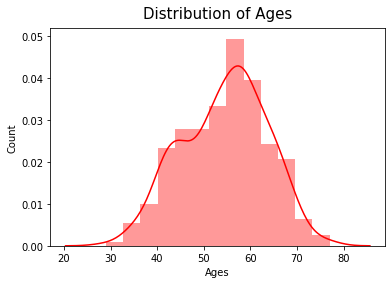

In [19]:
sns.distplot(df_train['age'], color='red')
plt.title('Distribution of Ages', fontsize=15, pad = 10)
plt.xlabel('Ages', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

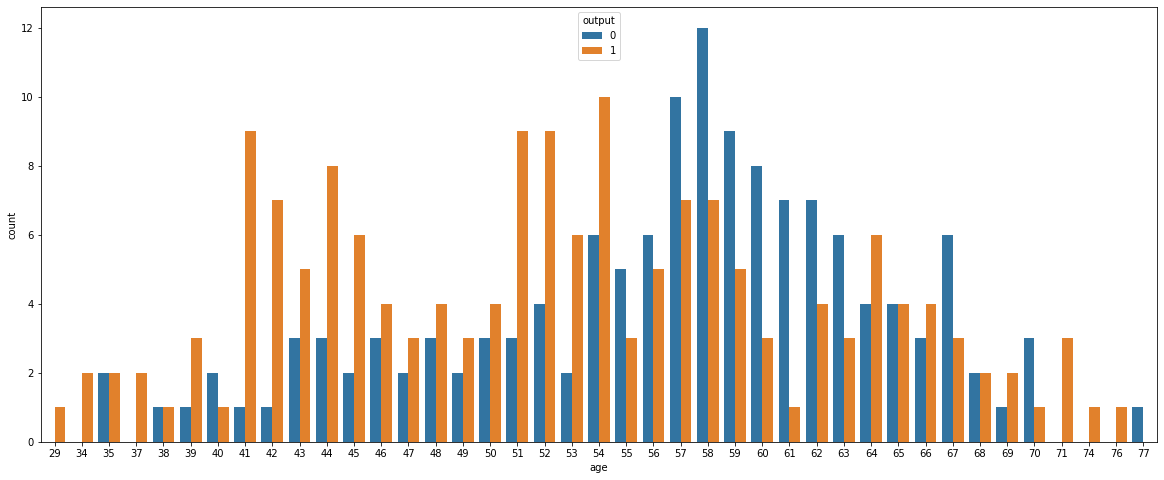

In [20]:
plt.figure(figsize =(20,8))
sns.countplot(x = df_train['age'],hue=df_train['output'])

## conclude that maximum heart attack patients are from the age of 41 to 65 (approximately).

In [21]:
print(df_train["age"].max())

77


Text(0.5, 1.0, 'No.of heart attacks w.r.to genger ')

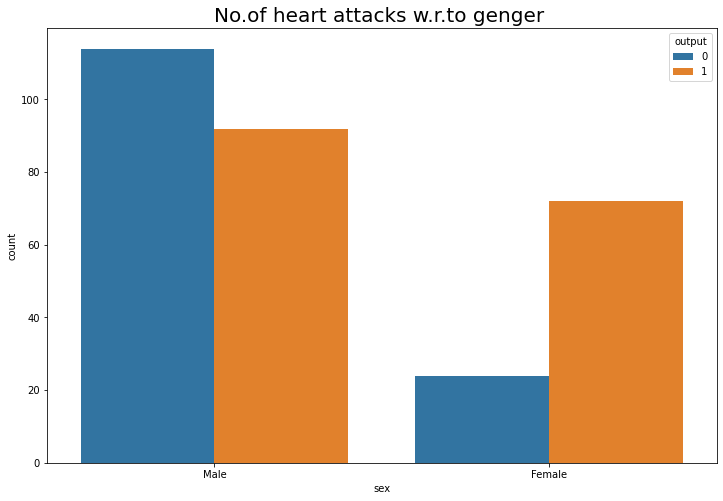

In [22]:
plt.figure(figsize = (12,8))

sex_data = df_train.sex.map({1: 'Male', 0: 'Female'})
sns.countplot(hue = 'output', x = sex_data, data = df_train)
plt.title("No.of heart attacks w.r.to genger ", fontsize = 20)


### Lets Check on the basis Of Blood pressure

Text(0.5, 1.0, 'Distribution of fasting Blood Sugar w.r.t. Heart Attack')

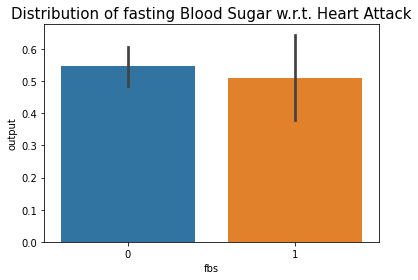

In [23]:
sns.barplot(x = 'fbs',y = 'output', data = df_train)
plt.title("Distribution of fasting Blood Sugar w.r.t. Heart Attack" , fontsize= 15)

Text(0.5, 1.0, 'Distribution of Chest Pain w.r.t. Heart Attack')

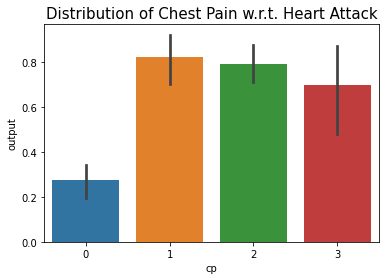

In [24]:
sns.barplot(x = 'cp', y = 'output', data = df_train)
plt.title("Distribution of Chest Pain w.r.t. Heart Attack" , fontsize= 15)

Text(0.5, 1.0, 'Distribution of no. of major blood vessels w.r.t. Heart Attack')

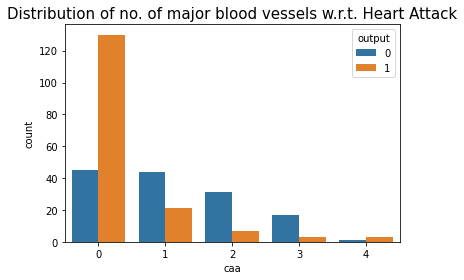

In [25]:
sns.countplot(x = 'caa', hue = 'output', data = df_train)
plt.title("Distribution of no. of major blood vessels w.r.t. Heart Attack" , fontsize= 15)

Text(0.5, 1.0, 'resting blood pressure (in mm Hg) vs Chest Pain')

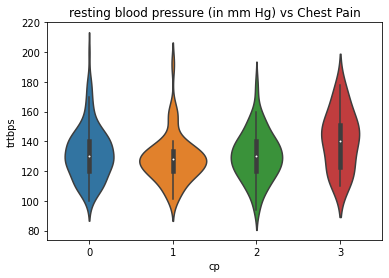

In [26]:
sns.violinplot(x = 'cp', y= 'trtbps', data = df_train)
plt.title('resting blood pressure (in mm Hg) vs Chest Pain')
# cp : Chest Pain type chest pain type
# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic

Text(0.5, 1.0, ' Max heart bits count while heart attack')

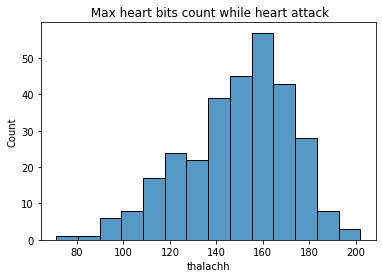

In [27]:
sns.histplot(x = 'thalachh', data = df_train)
# thalach : maximum heart rate achieved
plt.title(' Max heart bits count while heart attack')

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

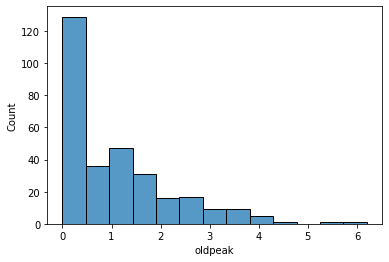

In [28]:
sns.histplot(x = 'oldpeak', data = df_train)
# oldpeak: Previous peak

Text(0.5, 1.0, 'No. of people who got heart attack')

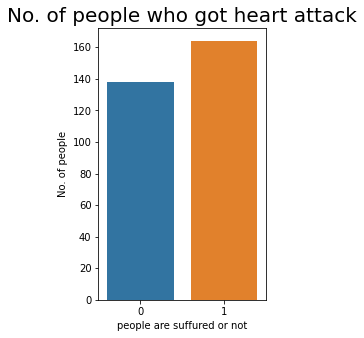

In [29]:
plt.figure(figsize = (3,5))
sns.countplot(x = 'output',data = df_train)
plt.ylabel('No. of people')
plt.xlabel('people are suffured or not')
plt.title('No. of people who got heart attack', fontsize = 20)

In [30]:
ratio = df_train['output'].value_counts()/len(df_train['output']) *100
ratio
# below result shows 54.3% people are suffered from heart attack 
## below result shows 45.7% people are not suffered from heart attack 


1    54.304636
0    45.695364
Name: output, dtype: float64

Distribution plot

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of blood pressure w.r. to intensity of blood pressure')

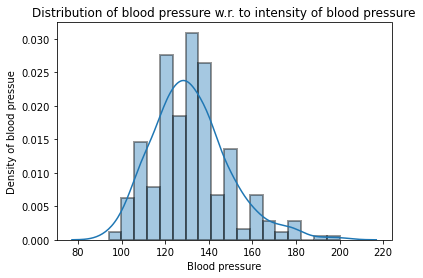

In [31]:
#blood pressure 
sns.distplot(df_train['trtbps'],hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel('Blood pressure')
plt.ylabel('Density of blood pressue')
plt.title('Distribution of blood pressure w.r. to intensity of blood pressure')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


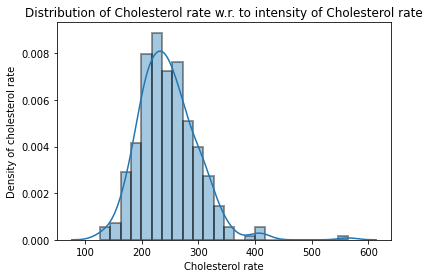

In [32]:
#cholesterol rate
sns.distplot(df_train['chol'],hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel('Cholesterol rate')
plt.ylabel('Density of cholesterol rate')
plt.title('Distribution of Cholesterol rate w.r. to intensity of Cholesterol rate')
plt.show()

### Relation of output with respect to other disease 

In [33]:
disease = ['cp','fbs','restecg','exng','slp','caa','thall']

In [34]:
list(enumerate(disease))

[(0, 'cp'),
 (1, 'fbs'),
 (2, 'restecg'),
 (3, 'exng'),
 (4, 'slp'),
 (5, 'caa'),
 (6, 'thall')]

In [35]:
df_train['restecg'].value_counts()
#resting electrocardiographic results
# 0 : Normal
# 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

1    151
0    147
2      4
Name: restecg, dtype: int64

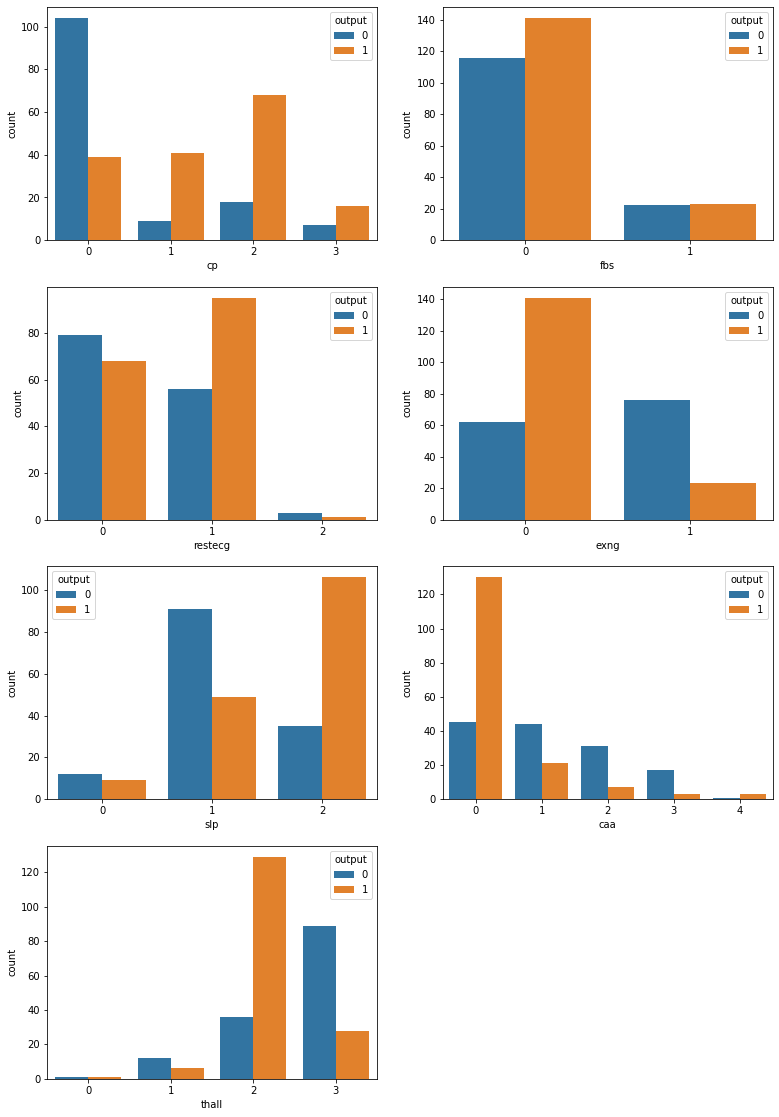

In [36]:
plt.figure(figsize = (13,30))
for i in enumerate(disease):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1], hue = 'output',data =df_train)
plt.show()

The people with maximum heart rate have more risk of heart attack - (thall) - maximum heart rate achieved

In [37]:
df_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
X = df_train.iloc[:,:-1]
Y = df_train.iloc[:,-1]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = (0.3),random_state = 5)

## Training Different ML Models 

### Hyperparameter tuning 

In [40]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
model_params = {'svm':{'model':svm.SVC(gamma ='auto'),'params':{"C":[1,20,40],'kernel':['rbf','linear']}},
               'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,20,40]}},
               'logistic_regression':{'model':LogisticRegression(solver = 'liblinear',multi_class ='auto',penalty='l1'),'params':{'C':[1,20,40],}}
              }
    
    

In [42]:
model_params.items()

dict_items([('svm', {'model': SVC(gamma='auto'), 'params': {'C': [1, 20, 40], 'kernel': ['rbf', 'linear']}}), ('random_forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 20, 40]}}), ('logistic_regression', {'model': LogisticRegression(penalty='l1', solver='liblinear'), 'params': {'C': [1, 20, 40]}})])

In [43]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,svm,0.810853,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.782614,{'n_estimators': 40}
2,logistic_regression,0.810853,{'C': 20}


Logistic regresion - Best score

In [44]:
model_lg = LogisticRegression(solver = 'liblinear',multi_class  = 'auto')
model_lg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [45]:
pred = model_lg.predict(x_test)
pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1])

In [46]:
Y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Other metriics score

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)


0.8514851485148515

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8351648351648352

In [49]:
from sklearn.metrics import precision_score
precision_score(y_test, pred)

0.8113207547169812

In [50]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.8958333333333334